In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# Information Entropy

## Objectives
+ Develop intuition about the information entropy of discrete random variables.

## Example: Information entropy of a distribution with two outcomes
Let's take a random variable $X$ with just two possible values, say $0$ and $1$.
It probability mass function can be described by two numbers:

$$
p_0 = p(X=0),
$$

and

$$
p_1 = p(X=1) = 1 - p_0.
$$

So, the information entropy of this distribution is simply a function of $p_0$:

$$
\mathbb{H}[p(X)] = -\sum_x \log p(x) p(x) = -p_0 \log p_0 - p_1 \log p_1 = -p_0 \log p_0 + (1-p_0)\log (1-p_0).
$$

Let's plot it as we vary $p_0$:

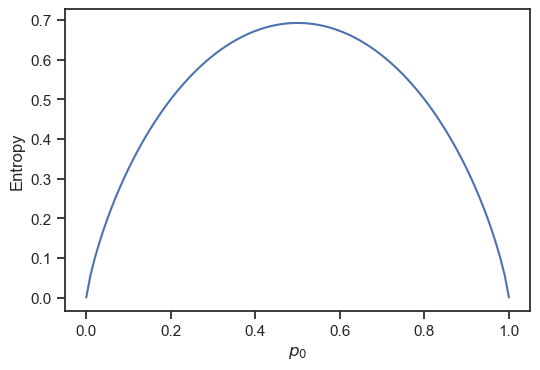

In [2]:
eps = 1e-8
p = np.linspace(eps, 1. - eps, 100)
H = -p * np.log(p) - (1. - p) * np.log(1. - p)

fig, ax = plt.subplots()
ax.plot(p, H)
ax.set_xlabel('$p_0$')
ax.set_ylabel('Entropy');

### Questions
+ For which $p_0$ do you get the maximum uncertainty (entropy)? --> 0.5
+ For which $p_0$'s do you get the minimum uncertainty? --> 0, 1
+ You are given two Categorical distributions:

$$
X\sim \operatorname{Categorical}(0.1, 0.3, 0.5, 0.1),
$$

and

$$
Y\sim \operatorname{Categorical}(0.2, 0.2, 0.4, 0.2).
$$

Let's visualize them:

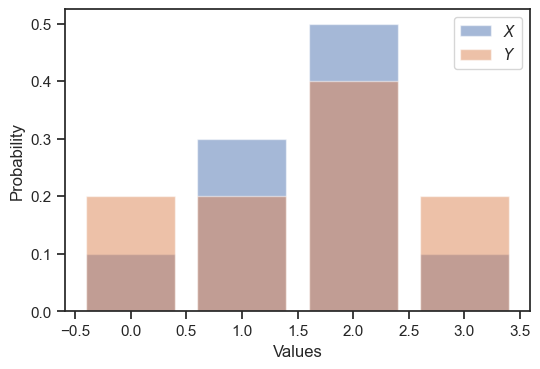

In [3]:
import scipy.stats as st

X = st.rv_discrete(
    values=(
        np.arange(4),
        [0.1, 0.3, 0.5, 0.1]
    )
)
Y = st.rv_discrete(
    values=(
        np.arange(4),
        [0.2, 0.2, 0.4, 0.2]
    )
)

fig, ax = plt.subplots()
ax.bar(
    range(4),
    X.pmf(np.arange(4)),
    alpha=0.5,
    label='$X$'
)
ax.bar(
    range(4),
    Y.pmf(np.arange(4)),
    alpha=0.5,
    label='$Y$'
)
plt.legend(loc='best')
ax.set_xlabel('Values')
ax.set_ylabel('Probability');

### Questions

+ Based on the picture above which of the two random variables, $X$ or $Y$, has the most uncertainty? --> Y has more uncertainty
+ Use the block code below to calculate the entropy of each one of the distributions and answer the question above (which variable is more uncertaint) in a quantitative way.
We can use the functionality of ``scipy.stats`` to compute the entropy.

In [4]:
ent_X = X.entropy()
print(f'H[X] = {ent_X:.2f}')
# Write code that computes and prints the entropy of Y

H[X] = 1.17


In [5]:
ent_Y = Y.entropy()
print(f'H[Y] = {ent_Y:.2f}')

H[Y] = 1.33
